# The Maze

## Description

In this project, you will write a computer code to generate a random maze using a recursive algorithm. You will also write the code to find a path between two points in a given maze.

The integer `n` specifies the size of the `n`-by-`n` array of cells in the maze.

The horizontal and the vertical *interior* walls of the maze are described by the arrays:

- `H`, Bool array of size `n`-by-`n-1`
- `V`, Bool array of size `n-1`-by-`n`

These arrays specify if there is a wall or not between two neighboring cells.

To see what we mean by the interior walls, consider the following example:

```python
n = 3
H = [[True, True], [False, True], [True, False]]
V = [[True, False, True], [True, True, False]]
```

The maze looks like this:

```julia
+---+---+---+
|   |       |
+---+---+   +
|       |   |
+---+   +---+
|   |   |   |
+---+---+---+
```

### Problem 1

To see what we are doing, we will start by writing a function `plot_maze` that takes the arrays `H` and `V` as input, and displays the maze as shown above.

- start with drawing the outer borders of the maze (this will also inform you about plotting the walls)
- then draw the vertical walls
- then draw the horizontal walls

Below you will find the code that will plot the maze for you.

You will need to write the function `plot_maze` that will be used by this code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
def plot_maze(H,V):
    n = np.size(H,0)
    plt.plot([0,n,n,0,0], [0,0,n,n,0], color='k')
    plt.axis("off")
    plt.axis('equal')

    for x in range(1, n):
        for y in range(1, n+1):
            if V[x-1][y-1] == True:
                plt.plot([x,x],[y-1,y], color='k')
                
    for x in range(1, n+1):
        for y in range(1, n):
            if H[x-1][y-1] == True:
                plt.plot([x-1,x],[y,y], color='k')

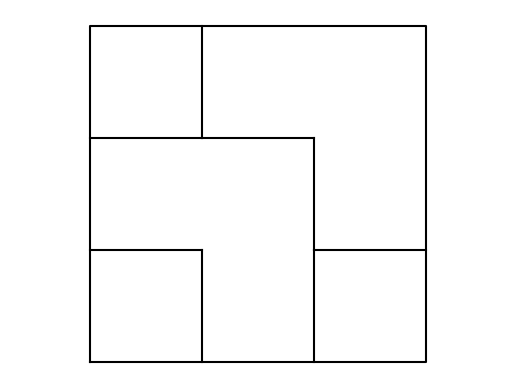

In [3]:
# Code for plotting the maze - should look like the example in the assignment
H = [[True, True], [False, True], [True, False]]
V = [[True, False, True], [True, True, False]]
plot_maze(H,V)
plt.show()

## Problem 2

We don't want to draw the maze by hand. We want to generate it randomly.
Consider the following example code:

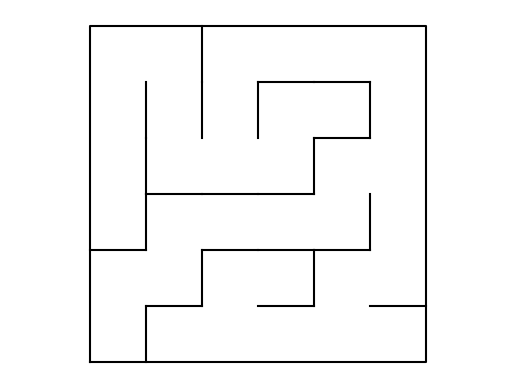

In [4]:
H = [[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [0, 1, 1, 0, 0], [1, 1, 1, 0, 1], [0, 1, 0, 1, 1], [1, 0, 0, 0, 0]]
V = [[1, 0, 1, 1, 1, 0], [0, 1, 0, 0, 1, 1], [0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0]]
plot_maze(H,V)
plt.show()

Drawing a maze by hand gets boring and complicated quickly. As `n` grows, so does the complexity of the maze. 

We can easily generate the arrays `H` and `V` starting with all walls using numpy. Then we can use a recursive algorithm to remove walls and create a maze.

We need 2 functions:
- `make_maze` that will generate the arrays `H` and `V` with all walls and then "dig" the maze. This function will take the size of the maze `n` as input.
- `dig` that will be a recursive function that will remove walls to create the maze. This function will take the arrays `H` and `V`, the current cell `(x, y)` values, the `visited` cells and the `path` that has been created so far. 

In the `make_maze` function:
- start by setting `H` and `V` with all walls to `True`
- create the `visited` array and the `path` list
- call the `dig` function with the initial cell `(0, 0)`
- return the `H` and `V` arrays

In the `dig` function:
- keep track of the visited cells
- keep track of the path
- check that possible moves are within the maze and that the next cell has not been visited
- if the next cell is valid, remove the wall between the current cell and the next cell
  - if there are multiple possible moves, choose one randomly
  - call the `dig` function recursively with the next cell coordinates
- if the next cell is not valid, backtrack to the previous cell
  - call the `dig` function recursively with the previous cell coordinates

MAKE SURE TO TEST YOUR CODE! The third code block down will call your `make_maze` function and plot the maze for a value of `n` that you specify.

In [5]:
def dig(x, y, visited, H, V, path):
    visited[x,y] = True
    
    new_cells = ((x+1, y), (x, y+1), (x-1, y), (x, y-1)) #le 4 possibli mosse

    size_max = np.size(H,0) -1 #size_max è la dimensione del labirinto, meno le pareti esterne (così è sempre entro i limiti dell'indice max)
    correct_cells = []

    if (x,y) not in path:
        path.append((x,y))

    #controllo le possibili celle
    for test_x, test_y in new_cells:
        if 0<=test_x<=size_max and 0<=test_y<=size_max and not visited[test_x, test_y]:
            correct_cells.append((test_x, test_y))

    # se non ci sono celle valide, torna indietro
    if len(correct_cells) == 0:
        previous_idx = path.index((x,y))-1
        if previous_idx >= 0:
            previous = path[previous_idx]
            dig(previous[0], previous[1], visited, H,V, path)
        return #non continuare non ci sono altri percorsi qui

    # se c'è più di una cella valida scegli una a caso, altrimenti scegli l'unica opzione valida
    pick = 0 if len(correct_cells)==1 else randint(0, len(correct_cells)-1)
    (new_x, new_y) = correct_cells[pick]

    #togli pareti
    if new_x == x:
        V[min(new_y, y)][size_max-x] = False
    if new_y == y:
        H[y][size_max-1-min([new_x, x])] = False

    dig(new_x, new_y, visited, H,V, path)

In [6]:
def make_maze(n):
    H = np.ones((n, n-1), dtype=bool)
    V = np.ones((n-1, n), dtype=bool)
    visited = np.zeros((n,n), dtype=bool)
    path = []
    dig(0,0, visited, H, V, path)
    return H,V # you should return the two arrays H and V

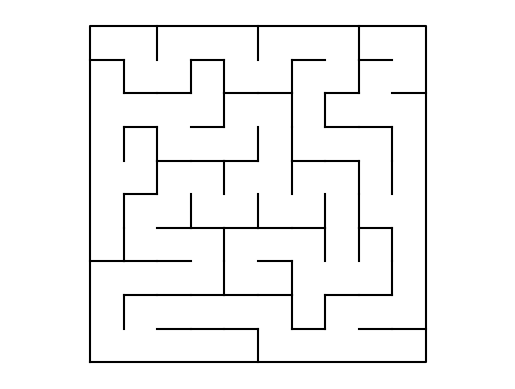

In [7]:
n = 10
H,V = make_maze(n)
plot_maze(H,V)

## Problem 3 - Find path from the top left to the bottom right

Next, write a function with the syntax

```python
path_x, path_y = find_path(H,V)
```

which finds a path in the maze `H,V` between the coordinates `0,n-1` and `n-1,0` using the following algorithm:

Create a function `find_path` which does the following:
1. Create an array `visited` to keep track of visited cells
2. Initialize empty vectors `path_x, path_y` to store the final path
3. Call `walk` for the starting coordinates and return `path_x, path_y`

Create a recursive function `walk` which performs the following:
1. If the position `x==n-1` and `y==0` is found (ie. the end of the maze), insert these values into `path_x, path_y` and return `true`
2. Otherwise, consider each neighbor of `x,y`. If the cell is valid, the maze has no wall in that direction, and the cell has not been visited, apply `walk` to the neighbor cell.
3. If any of the calls to `walk` returns `true`, insert `x,y` into `path_x, path_y` and return `true`


In [8]:
def walk(x,y,path_x,path_y,visited,H,V):
    visited[y][x]= True
    n = np.size(H,0)
    if x == n-1 and y==0: #abbiamo raggiunto la fine
        path_x.append(x)
        path_y.append(y)
        return True
    
    new_cells = ((x+1, y), (x, y+1), (x-1, y), (x, y-1)) #le 4 possibli mosse
    checked = np.ones(4, dtype=bool) # 4 = len(new_cells)

    while checked.sum() > 0:
        pick = randint(0,3)
        test_x, test_y = new_cells[pick]
        #se la cella è "out of bounds"
        if test_x>n-1 or test_x<0 or test_y>n-1 or test_y<0:
            checked[pick] = False
        #se la cella è già visitata
        elif visited[test_y][test_x]:
            checked[pick] = False
        #controlliamo le pareti
        #in direzione verticale
        elif test_x==x:
            if H[x][min(y,test_y)]:
                checked[pick] = False
        #in direzione orizontale
        elif test_y==y:
            if V[min(x, test_x)][y]:
                checked[pick] = False
            
        if checked[pick]:
            #se è ancora valida...
            if walk(test_x, test_y, path_x,path_y,visited,H,V):
                #la cella è parte del path
                #this is the way
                path_x.append(x)
                path_y.append(y)
                return True
            
    #niente più mosse in questa direzione
    return False

In [9]:
def find_path(H,V):
    path_x=[]
    path_y=[]
    n = np.size(H,0)
    visited = np.zeros((n,n), dtype=bool)
    walk(0, n-1, path_x, path_y, visited, H, V)
    return path_x, path_y

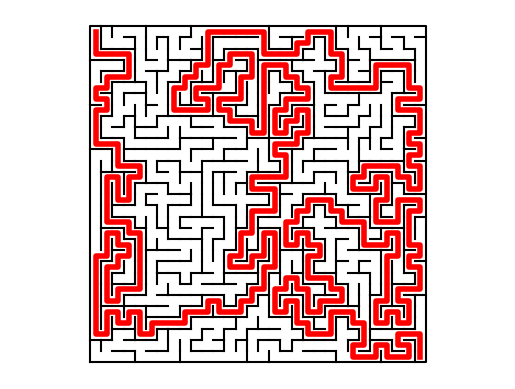

In [13]:
n = 30
H,V = make_maze(n)
plot_maze(H,V)
path_x, path_y = find_path(H,V)
plt.plot(np.add(path_x,[0.5 for i in range(np.size(path_x))]), np.add(path_y,[0.5 for i in range(np.size(path_y))]), color="r", linewidth=4)

In [12]:
# use only if you need to change the recursion limit:

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(21000) #was 3000
print(sys.getrecursionlimit())

3000
21000
